In [93]:
import sqlite3
import pandas as pd

takeaway_db = '../database/takeaway.db'
deliveroo_db = '../database/deliveroo/db'
ubereats_db = '../database/ubereats.db'

def query_db(db, sql_query):
    ''' input: db (Path to SQLite database), sql_query (str)
        output: pandas DAtaFrame
    '''
    conn = sqlite3.connect(db)
    with conn:
        res = pd.read_sql_query(sql_query, conn)
        if conn.close():
            return res

In [ ]:
query = 

In [1]:
import sqlite3

# Connect to the Deliveroo database
connection = sqlite3.connect(r"..\databases\deliveroo.db")

# Create a cursor object
cursor = connection.cursor()

# SQL query for top 10 restaurants by rating
query_restaurants = """
SELECT name, rating
FROM restaurants
ORDER BY rating DESC
LIMIT 10;
"""

# SQL query to analyze price distribution of menu items
query_price_distribution = """
SELECT price
FROM menu_items;
"""

try:
    # Execute the first query (Top 10 restaurants)
    cursor.execute(query_restaurants)
    results = cursor.fetchall()

    # Print results for the first query
    print("Top 10 Restaurants by Rating:")
    for row in results:
        print(f"Name: {row[0]}, Rating: {row[1]}")

    # Execute the second query (Price distribution)
    cursor.execute(query_price_distribution)
    prices = cursor.fetchall()

    # Convert fetched prices to a list of floats (filter invalid entries)
    price_list = []
    for price in prices:
        try:
            price_list.append(float(price[0]))
        except (ValueError, TypeError):
            # Skip invalid entries
            continue

    # Print a summary of price distribution
    print("\nPrice Distribution of Menu Items:")
    print(f"Total items: {len(price_list)}")
    print(f"Minimum price: {min(price_list):.2f}")
    print(f"Maximum price: {max(price_list):.2f}")
    print(f"Average price: {sum(price_list) / len(price_list):.2f}")

except sqlite3.Error as e:
    print(f"Error: {e}")

finally:
    # Close the connection
    connection.close()

Top 10 Restaurants by Rating:
Name: Neuhaus Woluwe Shopping, Rating: 5.0
Name: La Bagatelle de Lou, Rating: 5.0
Name: Yokubō - Meal Kits, Rating: 5.0
Name: Bar Buenos Aires - Empanadas, Rating: 4.9
Name: The Shack, Rating: 4.9
Name: The Kind Coconut, Rating: 4.9
Name: Neptune, Rating: 4.9
Name: Blend Wines , Rating: 4.9
Name: Moochie Aalst, Rating: 4.9
Name: TIKA, Rating: 4.9

Price Distribution of Menu Items:
Total items: 292038
Minimum price: -12.50
Maximum price: 2000.00
Average price: 6.06


In [4]:
import sqlite3

# Connect to the Deliveroo database
connection = sqlite3.connect(r"..\databases\deliveroo.db")

# Create a cursor object
cursor = connection.cursor()

# SQL query to find items with negative prices
query_find_negative_prices = """
SELECT *
FROM menu_items
WHERE price < 0;
"""
# Execute query to find negative prices
cursor.execute(query_find_negative_prices)
negative_prices = cursor.fetchall()
print("Negative prices found:", negative_prices)


Negative prices found: []


In [5]:
# SQL query to find the minimum price
query_min_price = """
SELECT MIN(price) AS min_price
FROM menu_items;
"""

cursor.execute(query_min_price)
min_price = cursor.fetchone()
print("Minimum price:", min_price[0])


Minimum price: -0.05


In [6]:
# SQL query to find items with the minimum price
query_items_with_min_price = """
SELECT *
FROM menu_items
WHERE price = (
    SELECT MIN(price) FROM menu_items
);
"""

cursor.execute(query_items_with_min_price)
items_with_min_price = cursor.fetchall()
print("Items with minimum price:", items_with_min_price)


Items with minimum price: [(1042492433, 110376, 135994854, 0, 'Tropicana Sinaasappelsap', None, '-0.05'), (1042492178, 110376, 135994854, 0, 'Tropicana Appelsap', None, '-0.05'), (1042492105, 110376, 135994854, 0, 'Large Vittel', None, '-0.05'), (1042492203, 110376, 135994854, 0, 'Large Perrier', None, '-0.05'), (1042513158, 295468, 135994217, 0, 'Tropicana Appelsap', None, '-0.05'), (1042512988, 295468, 135994217, 0, 'Large Vittel', None, '-0.05'), (1042512927, 295468, 135994217, 0, 'Large Perrier', None, '-0.05'), (1042491713, 275405, 135994469, 0, 'Tropicana Sinaasappelsap', None, '-0.05'), (1042491580, 275405, 135994469, 0, 'Tropicana Appelsap', None, '-0.05'), (1042491473, 275405, 135994469, 0, 'Large Vittel', None, '-0.05'), (1042491583, 275405, 135994469, 0, 'Large Perrier', None, '-0.05'), (1133723168, 449340, 145251859, 0, 'Tropicana Sinaasappelsap', None, '-0.05'), (1133722927, 449340, 145251859, 0, 'Tropicana Appelsap', None, '-0.05'), (1133722953, 449340, 145251859, 0, 'Lar

In [16]:
# SQL query to find the minimum price
query_min_price = """
SELECT MIN(price) AS min_price
FROM menu_items
WHERE price > 0;
"""

cursor.execute(query_min_price)
min_price = cursor.fetchone()
print("Minimum price:", min_price[0])


Minimum price: -0.05


In [17]:
# SQL query to check the type of the 'price' column
query_check_column_type = """
PRAGMA table_info(menu_items);
"""

cursor.execute(query_check_column_type)
columns_info = cursor.fetchall()
print("Column info:", columns_info)


Column info: [(0, 'id', 'INTEGER', 0, None, 1), (1, 'restaurant_id', 'INTEGER', 0, None, 2), (2, 'categorie_id', 'INTEGER', 0, None, 0), (3, 'alcohol', 'BOOLEAN', 0, None, 0), (4, 'name', 'TEXT', 0, None, 0), (5, 'description', 'TEXT', 0, None, 0), (6, 'price', '', 0, None, 0)]


In [18]:
# SQL query to cast price values to REAL and store in a new column
query_convert_prices = """
UPDATE menu_items
SET price_numeric = CAST(price AS REAL);
"""


In [19]:
# SQL query to safely convert price to REAL
query_safe_convert_prices = """
UPDATE menu_items
SET price_numeric = CASE
    WHEN price NOT LIKE '%[^0-9.-]%' THEN CAST(price AS REAL)
    ELSE NULL
END;
"""


In [ ]:
#PYTHON SCRYPT
# Add a new numeric column
query_add_numeric_column = """
ALTER TABLE menu_items ADD COLUMN price_numeric REAL;
"""
cursor.execute(query_add_numeric_column)
connection.commit()
print("New column 'price_numeric' added.")

# Convert values from price to price_numeric
query_safe_convert_prices = """
UPDATE menu_items
SET price_numeric = CASE
    WHEN price NOT LIKE '%[^0-9.-]%' THEN CAST(price AS REAL)
    ELSE NULL
END;
"""
cursor.execute(query_safe_convert_prices)
connection.commit()
print("Values from 'price' converted to 'price_numeric'.")


New column 'price_numeric' added.
Values from 'price' converted to 'price_numeric'.


In [21]:
# Check the first 10 rows of price and price_numeric
query_check_conversion = """
SELECT price, price_numeric
FROM menu_items
LIMIT 10;
"""
cursor.execute(query_check_conversion)
converted_data = cursor.fetchall()
print("Converted data:", converted_data)


Converted data: [('3.5', 3.5), ('25.0', 25.0), ('17.5', 17.5), ('7.0', 7.0), ('14.5', 14.5), ('9.5', 9.5), ('5.5', 5.5), ('6.5', 6.5), ('14.5', 14.5), ('11.5', 11.5)]


In [22]:
# SQL query to find the minimum price after conversion
query_min_valid_price = """
SELECT MIN(price_numeric) AS min_price
FROM menu_items
WHERE price_numeric > 0;
"""
cursor.execute(query_min_valid_price)
min_price = cursor.fetchone()
print("Minimum price:", min_price[0])


Minimum price: 0.02


In [23]:
# SQL query to find minimum, maximum, and average prices
query_basic_price_statistics = """
SELECT 
    MIN(price_numeric) AS min_price,
    MAX(price_numeric) AS max_price,
    AVG(price_numeric) AS avg_price
FROM menu_items
WHERE price_numeric > 0;
"""

# Execute the query and fetch results
cursor.execute(query_basic_price_statistics)
price_stats = cursor.fetchone()

# Display the results
print(f"Minimum Price: {price_stats[0]:.2f}")
print(f"Maximum Price: {price_stats[1]:.2f}")
print(f"Average Price: {price_stats[2]:.2f}")


Minimum Price: 0.02
Maximum Price: 2000.00
Average Price: 7.42


In [25]:
# SQL query to calculate the median price
query_median_price = """
WITH ranked_prices AS (
    SELECT 
        price_numeric,
        ROW_NUMBER() OVER (ORDER BY price_numeric) AS row_num,
        COUNT(*) OVER () AS total_count
    FROM menu_items
    WHERE price_numeric > 0
)
SELECT 
    AVG(price_numeric) AS median_price
FROM ranked_prices
WHERE row_num IN (
    (total_count + 1) / 2, 
    (total_count + 2) / 2
);
"""

# Execute the query and fetch the result
cursor.execute(query_median_price)
median_price = cursor.fetchone()[0]

# Display the result
print(f"Median Price: {median_price:.2f}")


Median Price: 4.59


In [27]:
import pandas as pd

# Create a DataFrame for price statistics
price_statistics_df = pd.DataFrame({
    'Metric': ['Minimum Price', 'Maximum Price', 'Average Price', 'Median Price'],
    'Value': [round(price_stats[0], 2), round(price_stats[1], 2), round(price_stats[2], 2), round(median_price, 2)]
})

print(price_statistics_df)



          Metric    Value
0  Minimum Price     0.02
1  Maximum Price  2000.00
2  Average Price     7.42
3   Median Price     4.59


In [29]:
price_statistics = pd.DataFrame({
    'Metric': ['Minimum Price', 'Maximum Price', 'Average Price', 'Median Price'],
    'Value': [round(price_stats[0], 2), round(price_stats[1], 2), round(price_stats[2], 2), round(median_price, 2)]
})
price_statistics_df = pd.DataFrame(price_statistics)


Now let's look at the average, minimum and maximum price for each category of dishes on the menu

In [30]:
# SQL query to calculate price distribution by categories
query_price_by_category = """
SELECT 
    categorie_id AS category,
    MIN(price_numeric) AS min_price,
    MAX(price_numeric) AS max_price,
    AVG(price_numeric) AS avg_price
FROM menu_items
WHERE price_numeric > 0
GROUP BY categorie_id
ORDER BY avg_price DESC;
"""


In [32]:
# Execute the query for price distribution by categories
cursor.execute(query_price_by_category)
price_by_category = cursor.fetchall()

# Prepare data for DataFrame
category_distribution = {
    'Metric': ['Category Distribution'] * len(price_by_category),
    'Category': [row[0] for row in price_by_category],
    'Min Price': [row[1] for row in price_by_category],
    'Max Price': [row[2] for row in price_by_category],
    'Avg Price': [row[3] for row in price_by_category]
}

# Create a DataFrame for this step
category_distribution_df = pd.DataFrame(category_distribution)

print(category_distribution_df)




                      Metric   Category  Min Price  Max Price   Avg Price
0      Category Distribution  155547475      20.00    2000.00  416.000000
1      Category Distribution  132638832      19.90    1990.00  352.250000
2      Category Distribution  122079052       6.00     600.00  244.800000
3      Category Distribution   62133568     106.00     425.00  188.285714
4      Category Distribution  140622320     150.00     150.00  150.000000
...                      ...        ...        ...        ...         ...
22719  Category Distribution  105952271       0.10       0.20    0.150000
22720  Category Distribution    1809994       0.15       0.15    0.150000
22721  Category Distribution     740719       0.15       0.15    0.150000
22722  Category Distribution   40188846       0.10       0.20    0.125000
22723  Category Distribution  129531405       0.05       0.05    0.050000

[22724 rows x 5 columns]


In [33]:
# Combine with the existing DataFrame (price_statistics_df from step 2.1)
main_df = pd.concat([price_statistics_df, category_distribution_df], ignore_index=True)

print(main_df)


                      Metric    Value     Category  Min Price  Max Price  \
0              Minimum Price     0.02          NaN        NaN        NaN   
1              Maximum Price  2000.00          NaN        NaN        NaN   
2              Average Price     7.42          NaN        NaN        NaN   
3               Median Price     4.59          NaN        NaN        NaN   
4      Category Distribution      NaN  155547475.0      20.00    2000.00   
...                      ...      ...          ...        ...        ...   
22723  Category Distribution      NaN  105952271.0       0.10       0.20   
22724  Category Distribution      NaN    1809994.0       0.15       0.15   
22725  Category Distribution      NaN     740719.0       0.15       0.15   
22726  Category Distribution      NaN   40188846.0       0.10       0.20   
22727  Category Distribution      NaN  129531405.0       0.05       0.05   

       Avg Price  
0            NaN  
1            NaN  
2            NaN  
3          

NOW TOP 10 the most expensive dishes

In [51]:
# SQL query for the most expensive items
query_most_expensive_items = """
SELECT 
    name AS item_name,
    price_numeric AS price
FROM menu_items
WHERE price_numeric IS NOT NULL 
  AND price_numeric > 0
ORDER BY price_numeric DESC
LIMIT 10;
"""


TOP 10 the most cheapest dishes

In [52]:
# SQL query for the cheapest items
query_cheapest_items = """
SELECT 
    name AS item_name,
    price_numeric AS price
FROM menu_items
WHERE price_numeric IS NOT NULL 
  AND price_numeric > 0
ORDER BY price_numeric ASC
LIMIT 10;
"""


In [53]:
# Execute the query for most expensive items
cursor.execute(query_most_expensive_items)
most_expensive = cursor.fetchall()

# Execute the query for cheapest items
cursor.execute(query_cheapest_items)
cheapest_items = cursor.fetchall()

# Prepare data for DataFrame
most_expensive_data = {
    'Metric': ['Most Expensive Items'] * len(most_expensive),
    'Item Name': [row[0] for row in most_expensive],
    'Price': [row[1] for row in most_expensive]
}

cheapest_items_data = {
    'Metric': ['Cheapest Items'] * len(cheapest_items),
    'Item Name': [row[0] for row in cheapest_items],
    'Price': [row[1] for row in cheapest_items]
}

# Create DataFrames
most_expensive_df = pd.DataFrame(most_expensive_data)
cheapest_items_df = pd.DataFrame(cheapest_items_data)

# Combine with the main DataFrame
main_df = pd.concat([main_df, most_expensive_df, cheapest_items_df], ignore_index=True)

print(main_df)


                      Metric    Value     Category  Min Price  Max Price  \
0              Minimum Price     0.02          NaN        NaN        NaN   
1              Maximum Price  2000.00          NaN        NaN        NaN   
2              Average Price     7.42          NaN        NaN        NaN   
3               Median Price     4.59          NaN        NaN        NaN   
4      Category Distribution      NaN  155547475.0       20.0     2000.0   
...                      ...      ...          ...        ...        ...   
91264         Cheapest Items      NaN          NaN        NaN        NaN   
91265         Cheapest Items      NaN          NaN        NaN        NaN   
91266         Cheapest Items      NaN          NaN        NaN        NaN   
91267         Cheapest Items      NaN          NaN        NaN        NaN   
91268         Cheapest Items      NaN          NaN        NaN        NaN   

       Avg Price Item Name  Price  
0            NaN       NaN    NaN  
1            Na

In [54]:
# Prepare data for DataFrame for most expensive items
most_expensive_data = {
    'Metric': ['Most Expensive Items'] * len(most_expensive),
    'Item Name': [row[0] for row in most_expensive],
    'Price': [row[1] for row in most_expensive]
}

# Prepare data for DataFrame for cheapest items
cheapest_items_data = {
    'Metric': ['Cheapest Items'] * len(cheapest_items),
    'Item Name': [row[0] for row in cheapest_items],
    'Price': [row[1] for row in cheapest_items]
}

# Create DataFrames
most_expensive_df = pd.DataFrame(most_expensive_data)
cheapest_items_df = pd.DataFrame(cheapest_items_data)


In [55]:
# Combine with the main DataFrame
main_df = pd.concat([main_df, most_expensive_df, cheapest_items_df], ignore_index=True)

print(main_df)


                      Metric    Value     Category  Min Price  Max Price  \
0              Minimum Price     0.02          NaN        NaN        NaN   
1              Maximum Price  2000.00          NaN        NaN        NaN   
2              Average Price     7.42          NaN        NaN        NaN   
3               Median Price     4.59          NaN        NaN        NaN   
4      Category Distribution      NaN  155547475.0       20.0     2000.0   
...                      ...      ...          ...        ...        ...   
91284         Cheapest Items      NaN          NaN        NaN        NaN   
91285         Cheapest Items      NaN          NaN        NaN        NaN   
91286         Cheapest Items      NaN          NaN        NaN        NaN   
91287         Cheapest Items      NaN          NaN        NaN        NaN   
91288         Cheapest Items      NaN          NaN        NaN        NaN   

       Avg Price Item Name  Price  
0            NaN       NaN    NaN  
1            Na

In [39]:
print(most_expensive)
print(cheapest_items)


[('Lamsbrochette Iskender', 2000.0), ('19 Som Tam Thai', 1990.0), ('Soepvlees zonder been', 1049.0), ('Vegetable Samosa', 600.0), ('Onion Bhajee', 600.0), ('Pauillac, Cru Classé, Château Pichon Longueville, 2005', 425.0), ('Miraval', 375.0), ('400 Wings', 250.0), ('Tignanello Toscana 2016 bottle', 245.0), ('GRAND SIECLE Laurent Perrier', 245.0)]
[('Ice Squeeze', 0.02), ('Miranda', 0.03), ('Miranda', 0.03), ('Miranda', 0.03), ('Miranda', 0.03), ('Miranda', 0.03), ('Miranda', 0.03), ('Miranda', 0.03), ('Miranda', 0.03), ('Miranda', 0.03)]


In [56]:
# Prepare data for DataFrame for most expensive items
most_expensive_data = {
    'Metric': ['Most Expensive Items'] * len(most_expensive),
    'Item Name': [row[0] for row in most_expensive],
    'Price': [row[1] for row in most_expensive],
    'Category': [None] * len(most_expensive),  # Add missing columns
    'Min Price': [None] * len(most_expensive),
    'Max Price': [None] * len(most_expensive),
    'Avg Price': [None] * len(most_expensive),
    'Value': [None] * len(most_expensive)
}

# Prepare data for DataFrame for cheapest items
cheapest_items_data = {
    'Metric': ['Cheapest Items'] * len(cheapest_items),
    'Item Name': [row[0] for row in cheapest_items],
    'Price': [row[1] for row in cheapest_items],
    'Category': [None] * len(cheapest_items),
    'Min Price': [None] * len(cheapest_items),
    'Max Price': [None] * len(cheapest_items),
    'Avg Price': [None] * len(cheapest_items),
    'Value': [None] * len(cheapest_items)
}

# Create DataFrames
most_expensive_df = pd.DataFrame(most_expensive_data)
cheapest_items_df = pd.DataFrame(cheapest_items_data)


In [57]:
# Append the new DataFrames to the main DataFrame
main_df = pd.concat([main_df, most_expensive_df, cheapest_items_df], ignore_index=True)

# Print the updated DataFrame
print(main_df)


                      Metric    Value     Category  Min Price  Max Price  \
0              Minimum Price     0.02          NaN        NaN        NaN   
1              Maximum Price  2000.00          NaN        NaN        NaN   
2              Average Price     7.42          NaN        NaN        NaN   
3               Median Price     4.59          NaN        NaN        NaN   
4      Category Distribution      NaN  155547475.0       20.0     2000.0   
...                      ...      ...          ...        ...        ...   
91304         Cheapest Items      NaN          NaN        NaN        NaN   
91305         Cheapest Items      NaN          NaN        NaN        NaN   
91306         Cheapest Items      NaN          NaN        NaN        NaN   
91307         Cheapest Items      NaN          NaN        NaN        NaN   
91308         Cheapest Items      NaN          NaN        NaN        NaN   

       Avg Price Item Name  Price  
0            NaN       NaN    NaN  
1            Na

C:\Users\Anastasiia\AppData\Local\Temp\ipykernel_7028\1941917689.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  main_df = pd.concat([main_df, most_expensive_df, cheapest_items_df], ignore_index=True)


ABNORMAL values

In [43]:
# SQL query to calculate mean and standard deviation for prices
query_price_stats = """
SELECT 
    AVG(price_numeric) AS avg_price,
    (SUM((price_numeric - (SELECT AVG(price_numeric) FROM menu_items WHERE price_numeric > 0)) * 
         (price_numeric - (SELECT AVG(price_numeric) FROM menu_items WHERE price_numeric > 0))) / 
         (COUNT(price_numeric) - 1)) AS std_dev
FROM menu_items
WHERE price_numeric > 0;
"""


In [44]:
# SQL query for very low prices
query_low_price_anomalies = """
SELECT 
    name AS item_name, 
    price_numeric AS price
FROM menu_items
WHERE price_numeric < 1
ORDER BY price_numeric ASC;
"""

# SQL query for very high prices
query_high_price_anomalies = """
SELECT 
    name AS item_name, 
    price_numeric AS price
FROM menu_items
WHERE price_numeric > 50
ORDER BY price_numeric DESC;
"""


In [45]:
# Execute the queries for low and high price anomalies
cursor.execute(query_low_price_anomalies)
low_price_anomalies = cursor.fetchall()

cursor.execute(query_high_price_anomalies)
high_price_anomalies = cursor.fetchall()

# Prepare data for DataFrame for anomalies
low_price_data = {
    'Metric': ['Low Price Anomalies'] * len(low_price_anomalies),
    'Item Name': [row[0] for row in low_price_anomalies],
    'Price': [row[1] for row in low_price_anomalies]
}

high_price_data = {
    'Metric': ['High Price Anomalies'] * len(high_price_anomalies),
    'Item Name': [row[0] for row in high_price_anomalies],
    'Price': [row[1] for row in high_price_anomalies]
}

# Create DataFrames
low_price_df = pd.DataFrame(low_price_data)
high_price_df = pd.DataFrame(high_price_data)

# Append anomalies to the main DataFrame
main_df = pd.concat([main_df, low_price_df, high_price_df], ignore_index=True)

print(main_df)


                      Metric    Value     Category  Min Price  Max Price  \
0              Minimum Price     0.02          NaN        NaN        NaN   
1              Maximum Price  2000.00          NaN        NaN        NaN   
2              Average Price     7.42          NaN        NaN        NaN   
3               Median Price     4.59          NaN        NaN        NaN   
4      Category Distribution      NaN  155547475.0       20.0     2000.0   
...                      ...      ...          ...        ...        ...   
91244   High Price Anomalies      NaN          NaN        NaN        NaN   
91245   High Price Anomalies      NaN          NaN        NaN        NaN   
91246   High Price Anomalies      NaN          NaN        NaN        NaN   
91247   High Price Anomalies      NaN          NaN        NaN        NaN   
91248   High Price Anomalies      NaN          NaN        NaN        NaN   

       Avg Price                                Item Name  Price  
0            NaN    

In [75]:
# Check for duplicates in 'Item Name'
print(cheapest_items_df['Item Name'].duplicated().sum())



58


In [76]:
# Sort by price and select top 10
top_cheapest_items_df = cheapest_items_df.sort_values(by='Price').head(10)


In [79]:
top_cheapest_items_df['Item Name'] = top_cheapest_items_df['Item Name'] + " (" + top_cheapest_items_df.index.astype(str) + ")"


In [80]:
top_cheapest_items_df = top_cheapest_items_df.drop_duplicates(subset='Item Name')


In [81]:
print(top_cheapest_items_df)


               Metric  Value  Category  Min Price  Max Price  Avg Price  \
22738  Cheapest Items    NaN       NaN        NaN        NaN        NaN   
22758  Cheapest Items    NaN       NaN        NaN        NaN        NaN   
91259  Cheapest Items    NaN       NaN        NaN        NaN        NaN   
22778  Cheapest Items    NaN       NaN        NaN        NaN        NaN   
91299  Cheapest Items    NaN       NaN        NaN        NaN        NaN   
91279  Cheapest Items    NaN       NaN        NaN        NaN        NaN   
22742  Cheapest Items    NaN       NaN        NaN        NaN        NaN   
22743  Cheapest Items    NaN       NaN        NaN        NaN        NaN   
22745  Cheapest Items    NaN       NaN        NaN        NaN        NaN   
22746  Cheapest Items    NaN       NaN        NaN        NaN        NaN   

                 Item Name  Price  
22738  Ice Squeeze (22738)   0.02  
22758  Ice Squeeze (22758)   0.02  
91259  Ice Squeeze (91259)   0.02  
22778  Ice Squeeze (22778)   0

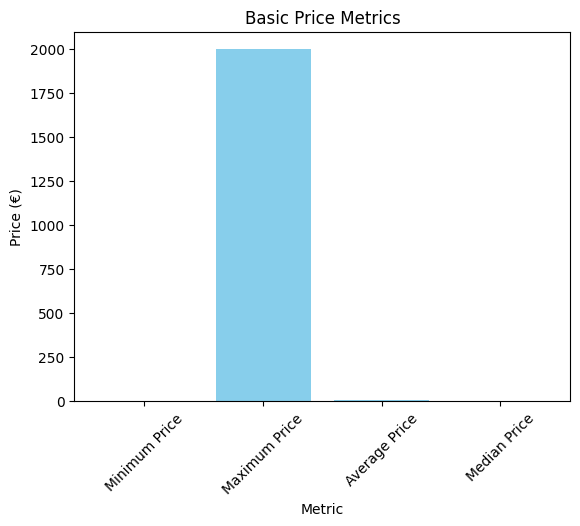

In [46]:
import matplotlib.pyplot as plt

# Фільтруємо дані для основних метрик
metrics_df = main_df[main_df['Metric'].isin(['Minimum Price', 'Maximum Price', 'Average Price', 'Median Price'])]

# Побудова графіка
plt.bar(metrics_df['Metric'], metrics_df['Value'], color='skyblue')
plt.title('Basic Price Metrics')
plt.ylabel('Price (€)')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.show()


C:\Users\Anastasiia\AppData\Local\Temp\ipykernel_7028\1091816430.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(metrics_df['Metric'], rotation=45)


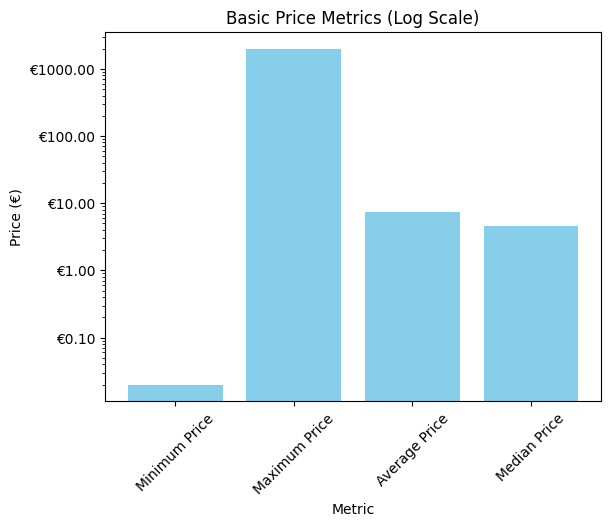

In [50]:
import matplotlib.ticker as ticker

# Logarithmic scale with euro formatting
fig, ax = plt.subplots()
ax.bar(metrics_df['Metric'], metrics_df['Value'], color='skyblue')
ax.set_yscale('log')
ax.set_title('Basic Price Metrics (Log Scale)')
ax.set_ylabel('Price (€)')
ax.set_xlabel('Metric')
ax.set_xticklabels(metrics_df['Metric'], rotation=45)

# Format Y-axis to show euro values
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"€{x:.2f}"))

plt.show()


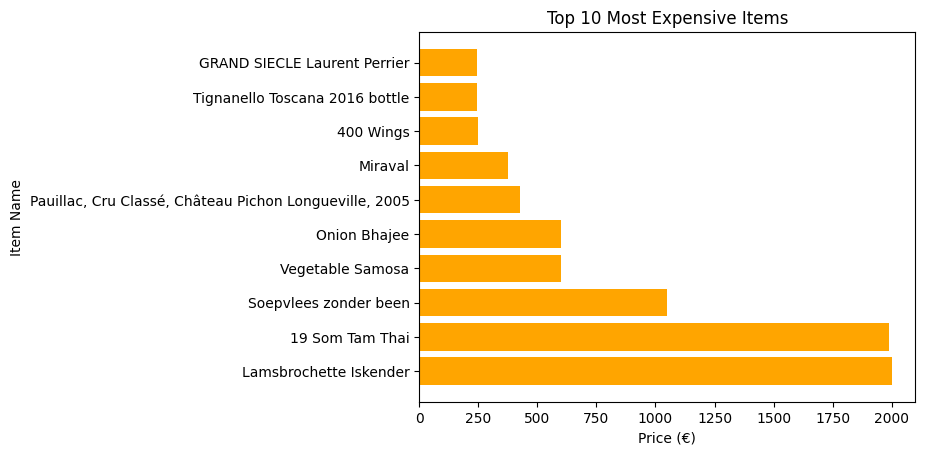

In [73]:
# We filter the data for most expensive dishes
expensive_items_df = main_df[main_df['Metric'] == 'Most Expensive Items']

# Build a graph
plt.barh(expensive_items_df['Item Name'], expensive_items_df['Price'], color='orange')
plt.title('Top 10 Most Expensive Items')
plt.xlabel('Price (€)')
plt.ylabel('Item Name')
plt.show()


In [87]:
query_low_price_uniq = """
SELECT DISTINCT name AS item_name, MIN(price_numeric) AS price
FROM menu_items
GROUP BY name
ORDER BY price ASC
LIMIT 10;
"""

In [86]:
"""
SELECT DISTINCT name, price_numeric
FROM menu_items
ORDER BY price_numeric ASC
LIMIT 10;
"""


'\nSELECT DISTINCT name, price_numeric\nFROM menu_items\nORDER BY price_numeric ASC\nLIMIT 10;\n'

In [85]:
"""
SELECT name AS item_name, MIN(price_numeric) AS price
FROM menu_items
GROUP BY name
ORDER BY price ASC
LIMIT 10;
"""


'\nSELECT name AS item_name, MIN(price_numeric) AS price\nFROM menu_items\nGROUP BY name\nORDER BY price ASC\nLIMIT 10;\n'

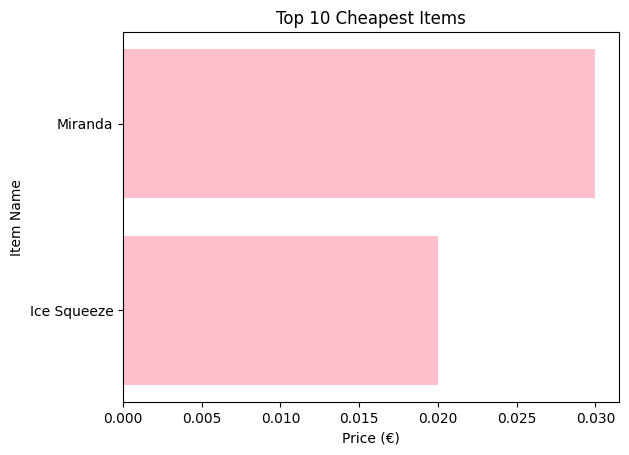

In [66]:
# We filter the data for the cheapest dishes
cheapest_items_df = main_df[main_df['Metric'] == 'Cheapest Items']

# Build a graph
plt.barh(cheapest_items_df['Item Name'], cheapest_items_df['Price'], color='pink')
plt.title('Top 10 Cheapest Items')
plt.xlabel('Price (€)')
plt.ylabel('Item Name')
plt.show()


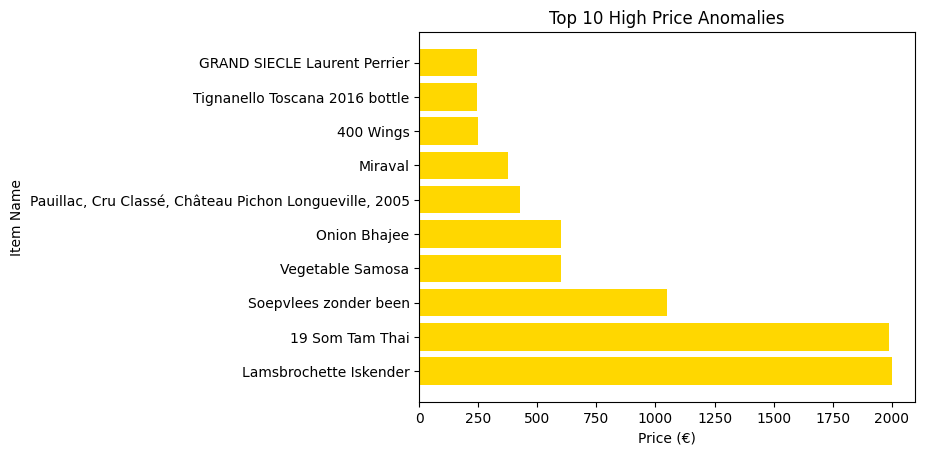

In [62]:
# Filter top 10 most expensive anomalies
top_high_price_anomalies = high_price_anomalies_df.sort_values(by='Price', ascending=False).head(10)

# Plot only top 10
plt.barh(top_high_price_anomalies['Item Name'], top_high_price_anomalies['Price'], color='gold')
plt.title('Top 10 High Price Anomalies')
plt.xlabel('Price (€)')
plt.ylabel('Item Name')
plt.show()
